# EDA & Modeling - Mason

#### RandomForest Regression
#### AdaBoost Regression

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading cleaned data
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  int64  
 10  month                    24496 non-null  int64  
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

In [4]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'year',
       'month', 'year_month', 'timestamp_3mos', 'year_month_3mos',
       'state_short', 'inflation_rate', 'inflation_rate_3mos', 'state',
       'employment_rate', 'employment_rate_3mos'],
      dtype='object')

In [5]:
# Quick look at numerical columns
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,year,month,inflation_rate,inflation_rate_3mos,employment_rate,employment_rate_3mos
count,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000
mean,236.763961,7.158433,2.700132,2019.508124,6.589606,0.015411,0.015649,0.925572,0.930437
std,130.793829,5.982022,3.290854,0.652234,3.070840,0.006829,0.008444,0.044118,0.048737
min,15.000000,0.000000,0.000000,2018.000000,1.000000,0.001000,0.001000,0.759883,0.747221
25%,158.000000,3.000000,0.000000,2019.000000,4.000000,0.013000,0.006000,0.889769,0.899878
50%,205.000000,6.000000,2.000000,2020.000000,7.000000,0.016000,0.018000,0.955321,0.957692
75%,280.000000,10.000000,4.000000,2020.000000,9.000000,0.021000,0.023000,0.960693,0.961051
max,4950.000000,41.000000,34.000000,2020.000000,12.000000,0.030000,0.030000,0.976102,0.976363


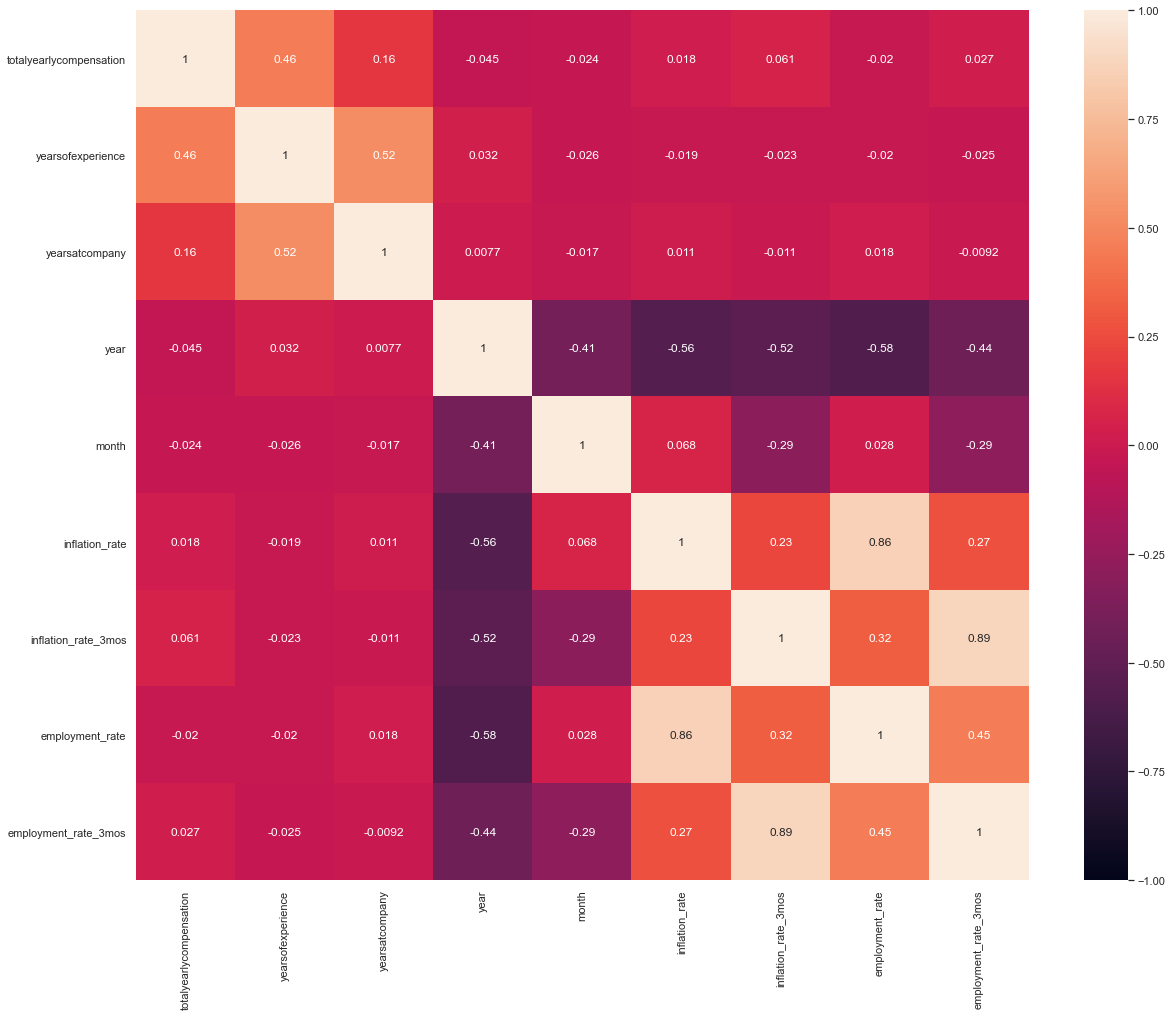

In [8]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1); 

sns.set(rc={'figure.figsize':(18,14)})

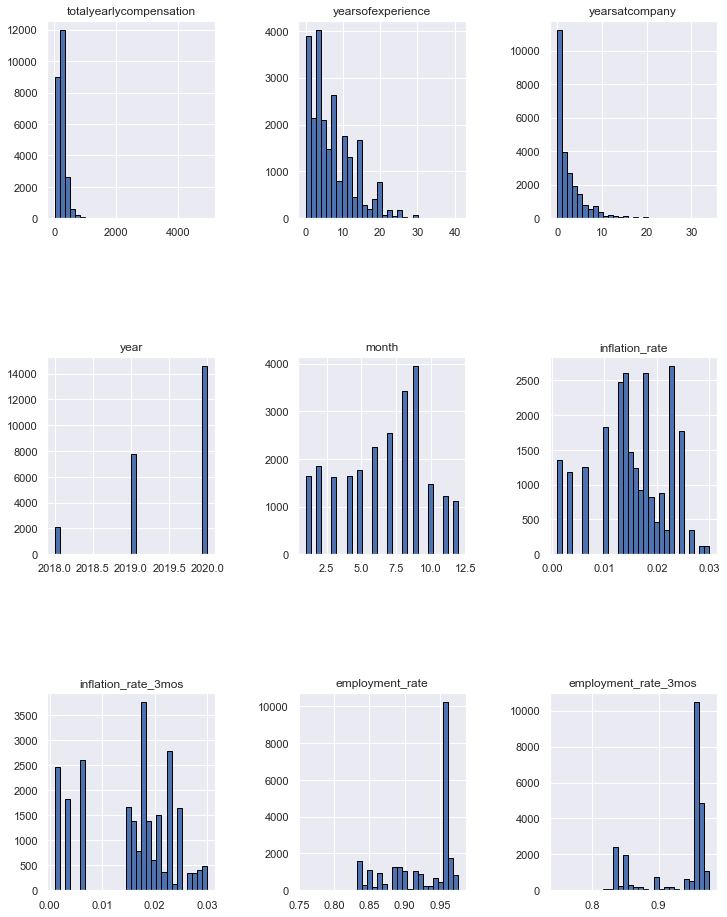

In [24]:
df.hist(figsize=(12,16), bins=30, edgecolor='black')
plt.subplots_adjust(hspace=0.7, wspace=0.5)

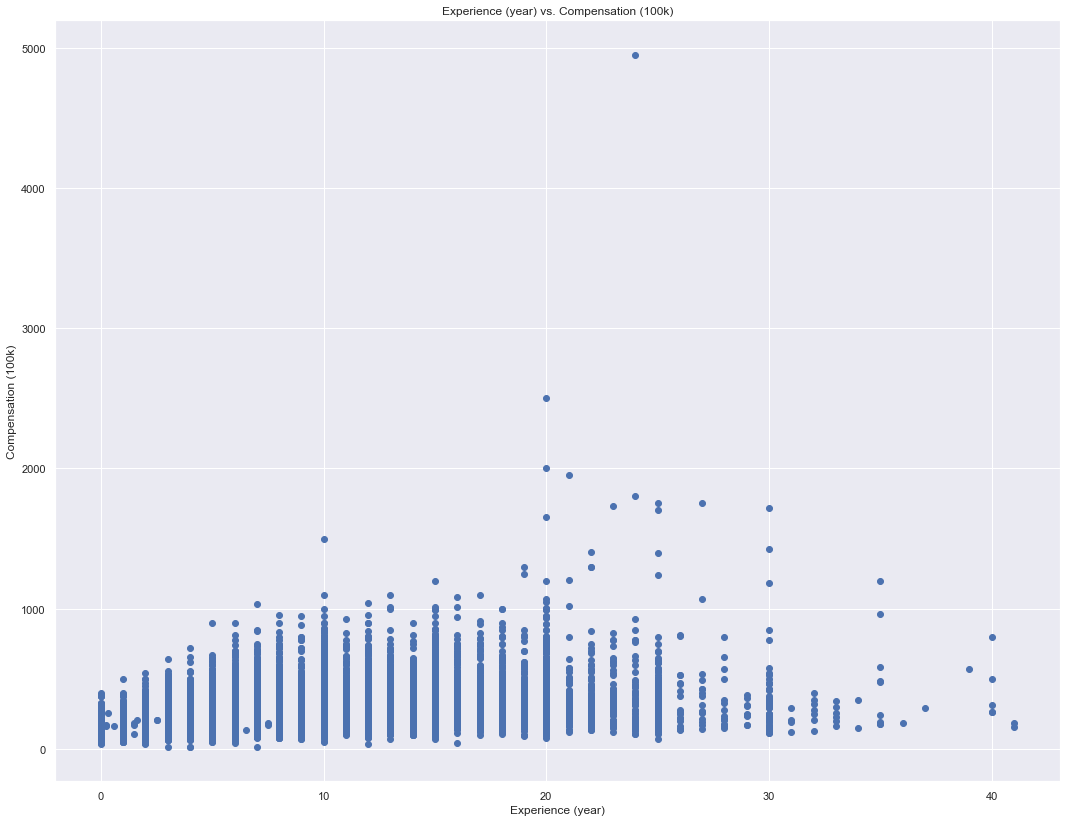

In [32]:
plt.scatter(df['yearsofexperience'], df['totalyearlycompensation'])
plt.title('Experience (year) vs. Compensation (100k)')
plt.ylabel('Compensation (100k)')
plt.xlabel('Experience (year)');

<AxesSubplot:title={'center':'Experience at Company'}, ylabel='Frequency'>

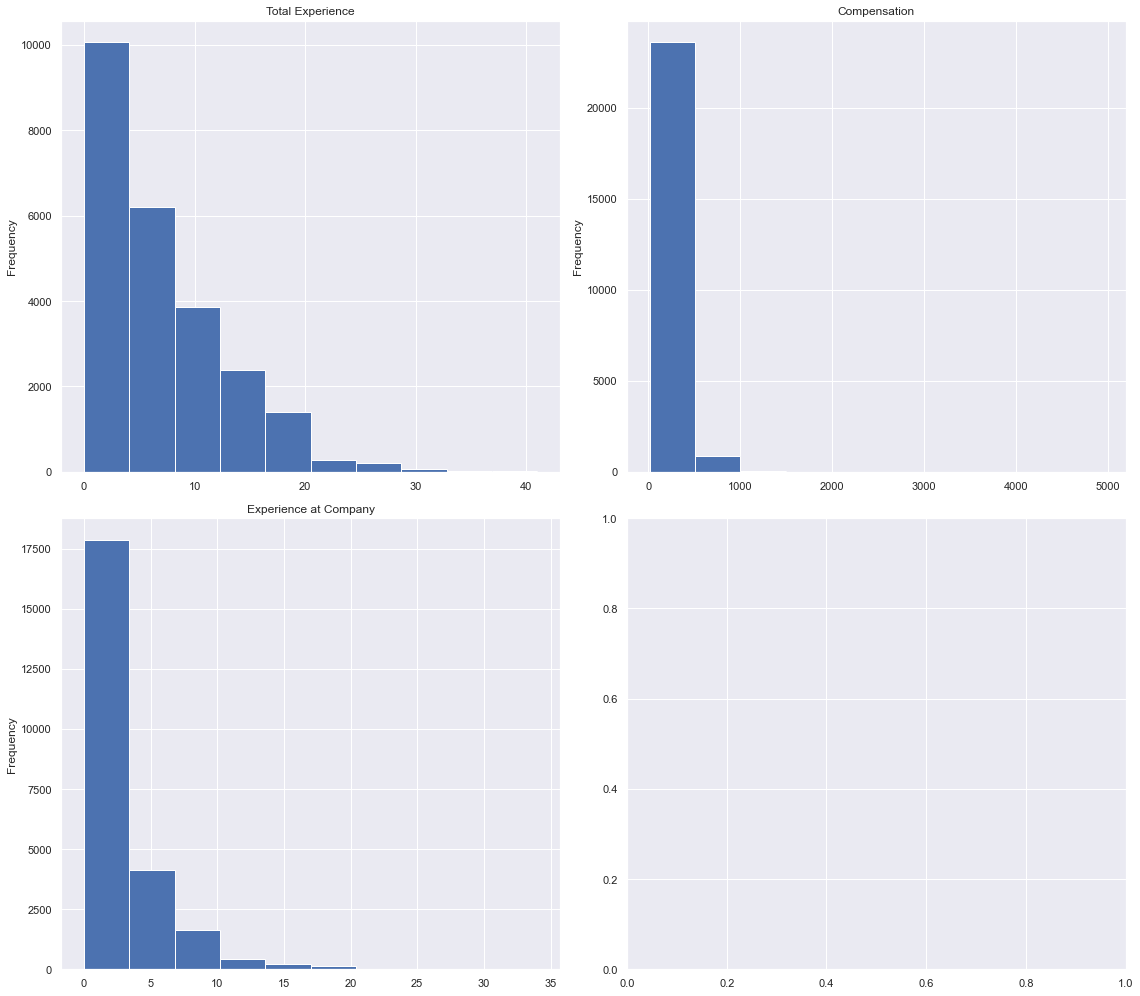

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,14), tight_layout = True)

# Plots
df['yearsofexperience'].plot(kind='hist', title='Total Experience', rot=0, ax=axs[0,0], grid=True)
df['totalyearlycompensation'].plot(kind='hist', title='Compensation', rot=0, ax=axs[0,1], grid=True)
df['yearsatcompany'].plot(kind='hist', title='Experience at Company', rot=0, ax=axs[1,0], grid=True)


In [52]:
df.groupby([df['location']], sort=False)['totalyearlycompensation'].value_counts()

location           totalyearlycompensation
Sunnyvale, CA      210.0                      26
                   200.0                      22
                   300.0                      22
                   180.0                      20
                   250.0                      20
                                              ..
Thousand Oaks, CA  123.0                       1
Torrance, CA       200.0                       1
Westport, CT       150.0                       1
Berlin, CT         85.0                        1
Iselin, NJ         85.0                        1
Name: totalyearlycompensation, Length: 8330, dtype: int64

In [ ]:
df.groupby([df['location']], sort=False)['totalyearlycompensation'].nunique()

In [54]:
# Grouped by Location and Total compensations
df.groupby(['location'])['totalyearlycompensation'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
"Alameda, CA",1.0,200.000000,NaN,200.0,200.00,200.0,200.00,200.0
"Albany, NY",1.0,86.000000,NaN,86.0,86.00,86.0,86.00,86.0
"Albuquerque, NM",3.0,117.666667,36.073998,83.0,99.00,115.0,135.00,155.0
"Alexandria, VA",2.0,102.500000,6.363961,98.0,100.25,102.5,104.75,107.0
"Aliso Viejo, CA",1.0,103.000000,NaN,103.0,103.00,103.0,103.00,103.0
...,...,...,...,...,...,...,...,...
"Windsor, CT",1.0,122.000000,NaN,122.0,122.00,122.0,122.00,122.0
"Winston Salem, NC",1.0,220.000000,NaN,220.0,220.00,220.0,220.00,220.0
"Woodland Hills, CA",1.0,88.000000,NaN,88.0,88.00,88.0,88.00,88.0


In [56]:
# Grouped by Location and Total compensations
df.groupby(['yearsofexperience'])['totalyearlycompensation'].describe()

,count,mean,std,min,25%,50%,75%,max
yearsofexperience,,,,,,,,
0.00,2152.0,156.025093,43.417257,35.0,130.00,157.0,179.25,400.0
0.25,2.0,166.000000,5.656854,162.0,164.00,166.0,168.00,170.0
0.30,1.0,255.000000,NaN,255.0,255.00,255.0,255.00,255.0
0.58,1.0,160.500000,NaN,160.5,160.50,160.5,160.50,160.5
1.00,1742.0,154.803387,48.927864,46.0,120.00,155.0,180.00,500.0
1.50,3.0,154.000000,41.388404,107.0,138.50,170.0,177.50,185.0
1.60,1.0,205.000000,NaN,205.0,205.00,205.0,205.00,205.0
2.00,2142.0,174.281046,59.546075,36.0,132.00,170.0,208.00,542.0
2.50,2.0,204.500000,3.535534,202.0,203.25,204.5,205.75,207.0


In [57]:
# Grouped by Location and Total compensations
df.groupby(['yearsatcompany'])['totalyearlycompensation'].describe()

,count,mean,std,min,25%,50%,75%,max
yearsatcompany,,,,,,,,
0.00,6226.0,220.249679,110.057125,35.0,155.00,190.0,254.0,1500.0
0.10,11.0,219.272727,77.343508,121.0,188.50,210.0,241.0,413.0
0.20,6.0,248.166667,113.877859,145.0,189.00,192.0,295.5,442.0
0.25,24.0,179.375000,53.282522,85.0,162.75,174.5,187.0,360.0
0.30,12.0,176.500000,59.465039,115.0,132.25,168.0,196.0,295.0
...,...,...,...,...,...,...,...,...
27.00,2.0,303.000000,131.521861,210.0,256.50,303.0,349.5,396.0
28.00,1.0,325.000000,NaN,325.0,325.00,325.0,325.0,325.0
30.00,1.0,320.000000,NaN,320.0,320.00,320.0,320.0,320.0


In [55]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'year',
       'month', 'year_month', 'timestamp_3mos', 'year_month_3mos',
       'state_short', 'inflation_rate', 'inflation_rate_3mos', 'state',
       'employment_rate', 'employment_rate_3mos'],
      dtype='object')